In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression

In [4]:
df=pd.read_csv('Hr_comma_sep.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


# TAKS1

# a) Visualize the impact of salary on employee retention

In [6]:
import seaborn as sns

<AxesSubplot:xlabel='salary', ylabel='count'>

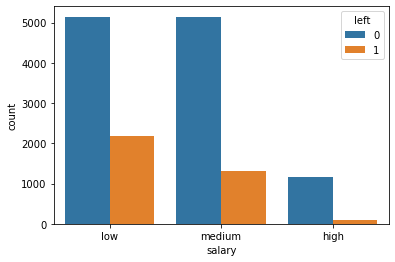

In [7]:
sns.countplot(x="salary",hue='left',data=df)

# b) Find the Department-wise employee retention rate.


In [9]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Department', ylabel='count'>

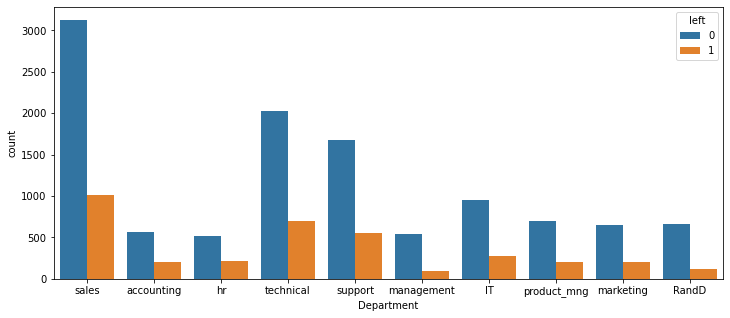

In [10]:
plt.figure(figsize = (12,5))
sns.countplot(x="Department" , hue = 'left' ,data =df)

# Task2

# a) Access the missing value.


In [11]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

# b) Detect correlations in the dataset.

In [12]:
correlation=df.corr()
correlation

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


<AxesSubplot:>

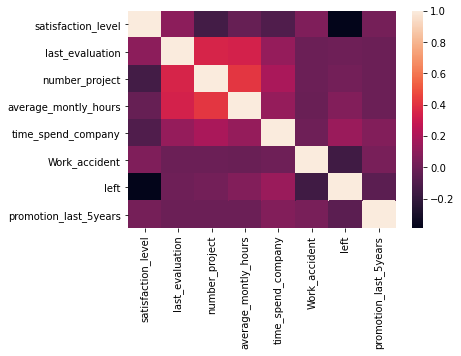

In [13]:
sns.heatmap(correlation)

# c) Data preparation: Salary and department have all text data. Convert them to numbers.

In [14]:
X = df.iloc[:, [0,1,2,3,4,5,8,9]]
Y = df.iloc[:, 6]

In [16]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
X['Department'] = labelencoder.fit_transform(X['Department'])
X['salary'] = labelencoder.fit_transform(X['salary'])
X

<ipython-input-16-202bc4538ebf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Department'] = labelencoder.fit_transform(X['Department'])
<ipython-input-16-202bc4538ebf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['salary'] = labelencoder.fit_transform(X['salary'])


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,Department,salary
0,0.38,0.53,2,157,3,0,7,1
1,0.80,0.86,5,262,6,0,7,2
2,0.11,0.88,7,272,4,0,7,2
3,0.72,0.87,5,223,5,0,7,1
4,0.37,0.52,2,159,3,0,7,1
...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,8,1
14995,0.37,0.48,2,160,3,0,8,1
14996,0.37,0.53,2,143,3,0,8,1
14997,0.11,0.96,6,280,4,0,8,1


# Task3

# a) Split the data into train and test sets.

In [17]:
from sklearn.model_selection import train_test_split

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=0)

In [40]:
X_train

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,Department,salary
5150,0.92,0.88,3,184,3,1,9,1
13288,0.97,0.57,4,150,2,0,0,2
8,0.89,1.00,5,224,5,0,7,1
1832,0.82,0.92,4,252,5,0,5,2
13827,0.62,0.40,3,158,8,1,5,1
...,...,...,...,...,...,...,...,...
13123,0.52,0.57,3,270,3,0,1,1
3264,0.59,0.79,4,209,2,0,9,2
9845,0.69,0.94,5,259,2,0,0,2
10799,0.78,0.59,5,236,3,0,9,0


# b) Logistic Regression: Train the model and predict the outcome for test data.Calculate the accuracy of the training dataset

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
logistic_regression= LogisticRegression()

In [43]:
logistic_regression.fit(X_train,y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [44]:
y_pred=logistic_regression.predict(X_test)

In [45]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [46]:
y_pred_df = pd.DataFrame(y_pred)

In [47]:
y_pred_df.value_counts()

0    3275
1     475
dtype: int64

# c) Test for the accuracy of the model on test data.

In [48]:
from sklearn.metrics import accuracy_score

print('accuracy :', accuracy_score(y_test, y_pred))

accuracy : 0.76


# Task4

# a) Confusion matrix: Calculate Accuracy, Recall, F1-score and Precision

In [49]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[2628,  253],
       [ 647,  222]], dtype=int64)

In [50]:
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

print('accuracy:', accuracy_score(y_test, y_pred))
print('recall:', recall_score(y_test, y_pred))
print('f1-score:', f1_score(y_test, y_pred))
print('precision:', precision_score(y_test, y_pred))

accuracy: 0.76
recall: 0.2554660529344074
f1-score: 0.3303571428571429
precision: 0.4673684210526316


In [32]:
from sklearn.metrics import roc_auc_score

In [51]:
lr_prob = logistic_regression.predict_proba(X_test)
lr_prob

array([[0.61906267, 0.38093733],
       [0.68591656, 0.31408344],
       [0.93074859, 0.06925141],
       ...,
       [0.80617228, 0.19382772],
       [0.77264466, 0.22735534],
       [0.75272908, 0.24727092]])

In [52]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [53]:
lr_1 = lr_prob[:,1]
lr_1

array([0.38093733, 0.31408344, 0.06925141, ..., 0.19382772, 0.22735534,
       0.24727092])

In [54]:
score = roc_auc_score(y_test,lr_1)
score

0.8096512646444765

# REAL TIME PREDECATION

In [55]:
satisfaction_level=0.38
last_evaluation=0.53
number_project=2
average_montly_hours=157
time_spend_company=3
Work_accident=0
Department =7
salary=1

In [56]:
logistic_regression.predict([[0.38,0.53,2,157,3,0,7,1]])

array([0], dtype=int64)